### 1

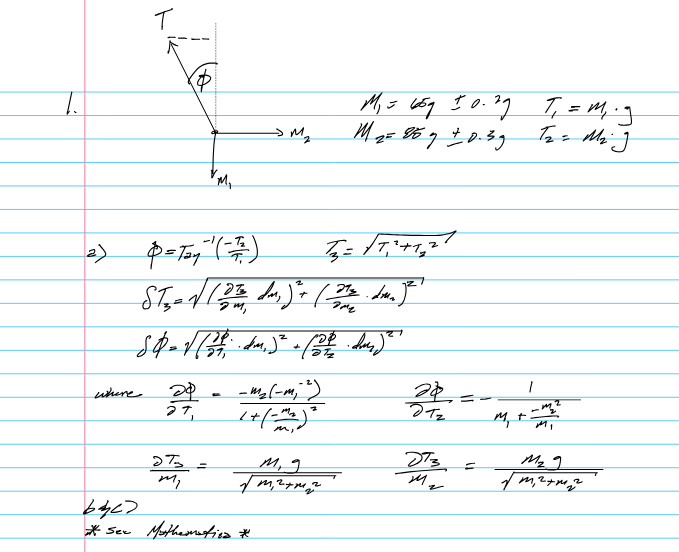

### 1.b&c Mathematica code:
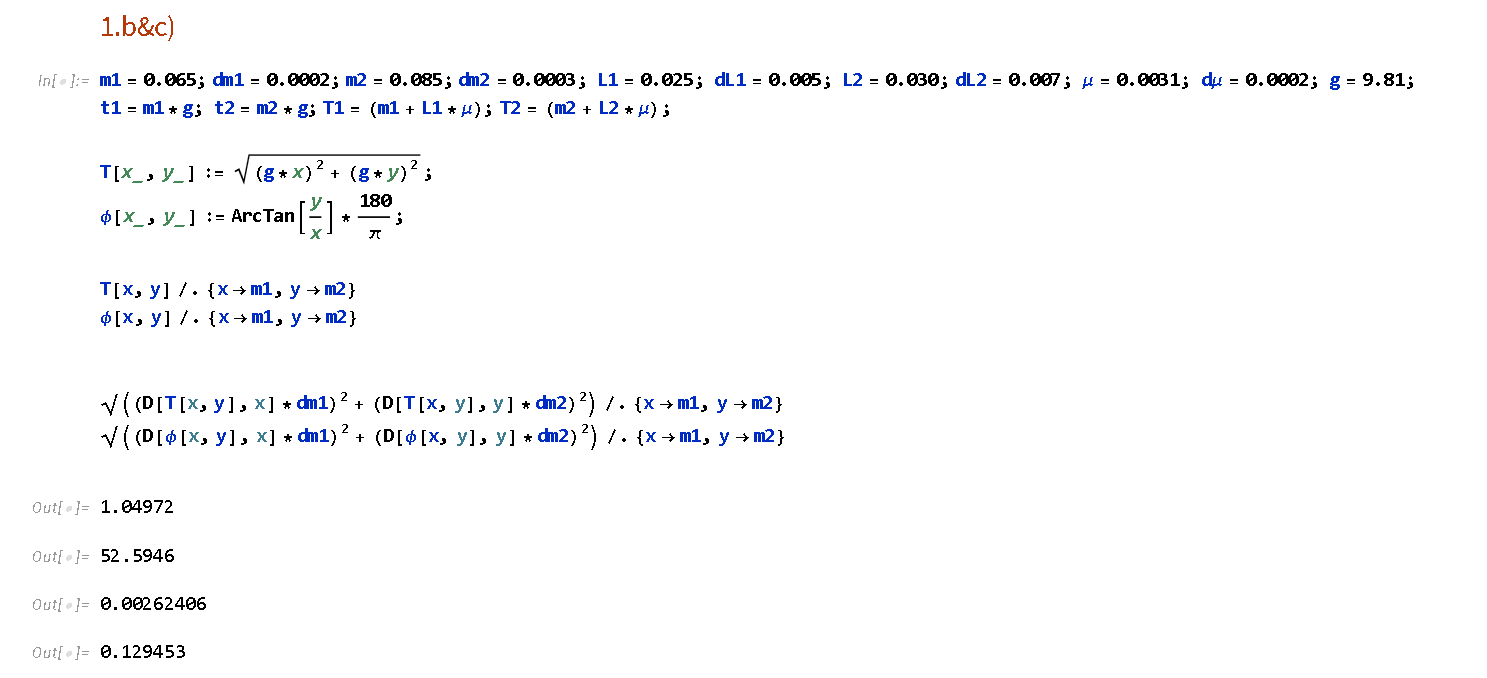

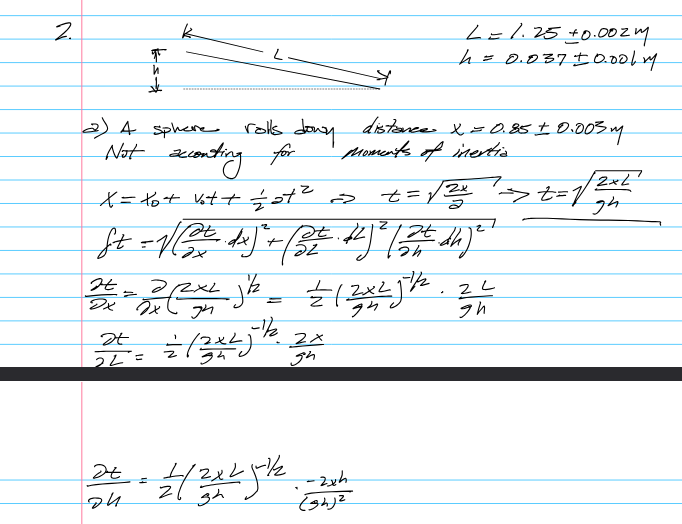

### 2.b

In [2]:
import sympy as sym
from numpy import sqrt

g=9.81

x,h,L=sym.symbols("x,h,L")

time=sym.sqrt(2*x*L/g/h)

dt_dx = sym.diff(time, x)
dt_dh = sym.diff(time, h)
dt_dL = sym.diff(time, L)

L,dL=1.25,0.002
h,dh=0.037,0.001
x,dx=0.85,0.003

sub = {'x': x,'h': h,'L': L,}

t=time.subs(sub).evalf(6)

dt=sqrt( (float(dt_dx.subs(sub).evalf(6))*dx)**2 + (float(dt_dh.subs(sub).evalf(6))*dh)**2 +(float(dt_dL.subs(sub).evalf(6))*dL)**2 )
print(f"Elasped time:{t:.2f} +- {dt:.2f} s")


Elasped time:2.42 +- 0.03 s


### 3.a

In [8]:
from numpy import pi, sqrt
import sympy as sym

g=9.8
L,r,Ls=sym.symbols("L r Ls")

period=2*pi*sym.sqrt((Ls+r)/g)

dT_dLs=sym.diff(period,Ls)
dT_dr=sym.diff(period,r)

Ls,dLs=2.7265,0.0003
r,dr=0.0393272,0.0005/(2*pi)

sub={'Ls':Ls,'r':r}

T=period.subs(sub).evalf(6)
dT=sqrt( (float(dT_dr.subs(sub).evalf(6))*dr)**2 + (float(dT_dLs.subs(sub).evalf(6))*dLs)**2 )

print(f"Predicted period of pendulum without accounting for \nmoments of inertia: {T:.4f} +- {dT:.4f} s")

Predicted period of pendulum without accounting for 
moments of inertia: 3.3380 +- 0.0002 s


### 3.b

In [4]:
L,T=sym.symbols("L T")

gravity=4*pi**2*L/T**2

dg_dL=sym.diff(gravity,L)
dg_dT=sym.diff(gravity,T)

L,dL=0.85,0.003
T,dT=1.83,0.06

sub={'L':L,'T':T}

g=gravity.subs(sub).evalf(6)

dg=sqrt( (float(dg_dL.subs(sub).evalf(6))*dL)**2 + (float(dg_dT.subs(sub).evalf(6))*dT)**2 )

print(f"Predicted gravitational constant without accounting for \nmoments of inertia: {g:.1f} +- {dg:.1f} m/s^2")


Predicted gravitational constant without accounting for 
moments of inertia: 10.0 +- 0.7 m/s^2


### 3.c

In [8]:
from numpy import pi
# initialize which variables are symbolic
L_cm, T, m_b, r, L_s, L=sym.symbols("L_cm T m_b r L_s L")

L_string=L-r
dL_string_dL=sym.diff(L_string, L)
dL_string_dr=sym.diff(L_string, r)

r,dr=0.0281,0.0002
L,dL=0.85,0.003
m_s=0.0065
sub={'L':L,'r':r}
L_s1,dL_s1=L_string.subs(sub).evalf(6),sqrt( (float(dL_string_dL.subs(sub).evalf(6))*dL)**2 + (float(dL_string_dr.subs(sub).evalf(6))*dr)**2 )

L_cm, T, m_b, r, L, L_s=sym.symbols("L_cm T m_b r L L_s")

L_centermass=(m_s*L_s/2+m_b*L)/(m_s+m_b)
dL_centermass_dm_b=sym.diff(L_centermass,m_b)
dL_centermass_dL=sym.diff(L_centermass,L)
dL_centermass_dL_s=sym.diff(L_centermass,L_s)

m_b,dm_b=0.250, 0.002
r,dr=0.0281,0.0002
L,dL=0.85,0.003
m_s=0.0065

sub={'L':L,'r':r, 'L_s':L_s1, 'm_b':m_b,}
L_cm1,dL_cm1=L_centermass.subs(sub).evalf(6), sqrt( (float(dL_centermass_dm_b.subs(sub).evalf(6))*dm_b)**2 + (float(dL_centermass_dL.subs(sub).evalf(6))*dL)**2 + (float(dL_centermass_dL_s.subs(sub).evalf(6))*dL_s1)**2 ) 

L_cm, T, m_b, r, L, L_s=sym.symbols("L_cm T m_b r L L_s")

gravity=4*pi**2*(2*m_b*r**2/5+m_b*L**2+m_s*L_s**2/3)/T**2/(m_s+m_b)/L_cm

dg_dL_cm=sym.diff(gravity,L_cm)
dg_dT=sym.diff(gravity,T)
dg_dm_b=sym.diff(gravity,m_b)
dg_dL_s=sym.diff(gravity,L_s)
dg_dr=sym.diff(gravity,r)
dg_dL=sym.diff(gravity,L)

T,dT=1.83,0.06
m_b,dm_b=0.250, 0.002
r,dr=0.0281,0.0002
L,dL=0.85,0.003
m_s=0.0065
sub={'L_cm':L_cm1,'T':T,'m_b':m_b,'r':r, 'L_s': L_s1, 'L':L}

g=gravity.subs(sub).evalf(6)

dg=sqrt( (float(dg_dL.subs(sub).evalf(6))*dL)**2 + (float(dg_dL_cm.subs(sub).evalf(6))*dL_cm1)**2 + (float(dg_dT.subs(sub).evalf(6))*dT)**2 + (float(dg_dm_b.subs(sub).evalf(6))*dm_b)**2 + (float(dg_dr.subs(sub).evalf(6))*dr)**2 + (float(dg_dL_s.subs(sub).evalf(6))*dL_s1)**2)

print(f"Predicted gravitational constant with accounting for \nmoments of inertia: {g:.2f} +- {dg:.2f} m/s^2")


Predicted gravitational constant with accounting for 
moments of inertia: 9.98 +- 0.66 m/s^2


In [10]:
from numpy import pi
g=9.8

m_b,r,L,L_s,L_cm = sym.symbols('m_b r L L_s L_cm')

time=2*pi*sym.sqrt( (2*m_b*r**2/5+m_b*L**2+m_s*L_s**2/3)/((m_s+m_b)*g*L_cm) )

dt_dm_b=sym.diff(time,m_b)
dt_dr=sym.diff(time,r)
dt_dL=sym.diff(time,L)
dt_dL_s=sym.diff(time,L_s)
dt_dL_cm=sym.diff(time,L_cm)

m_b,dm_b=0.250, 0.002
r,dr=0.0281,0.0002
L,dL=0.85,0.003

sub={'m_b':m_b,'r':r, 'L_cm':L_cm1,'T':T,'L_s': L_s1, 'L':L}

t=time.subs(sub).evalf(6)
dt=sqrt( (float(dt_dm_b.subs(sub).evalf(6))*dm_b)**2 + (float(dt_dr.subs(sub).evalf(6))*dr)**2 + (float(dt_dL.subs(sub).evalf(6))*dL)**2 + (float(dt_dL_s.subs(sub).evalf(6))*dL_s1)**2 + (float(dt_dL_cm.subs(sub).evalf(6))*dL_cm1)**2 )

print(f"Predicted period of pendulum with accounting for \nmoments of inertia: {t:.3f} +- {dt:.3f} s")


Predicted period of pendulum with accounting for 
moments of inertia: 1.847 +- 0.007 s


### Mathematica Section for bonus
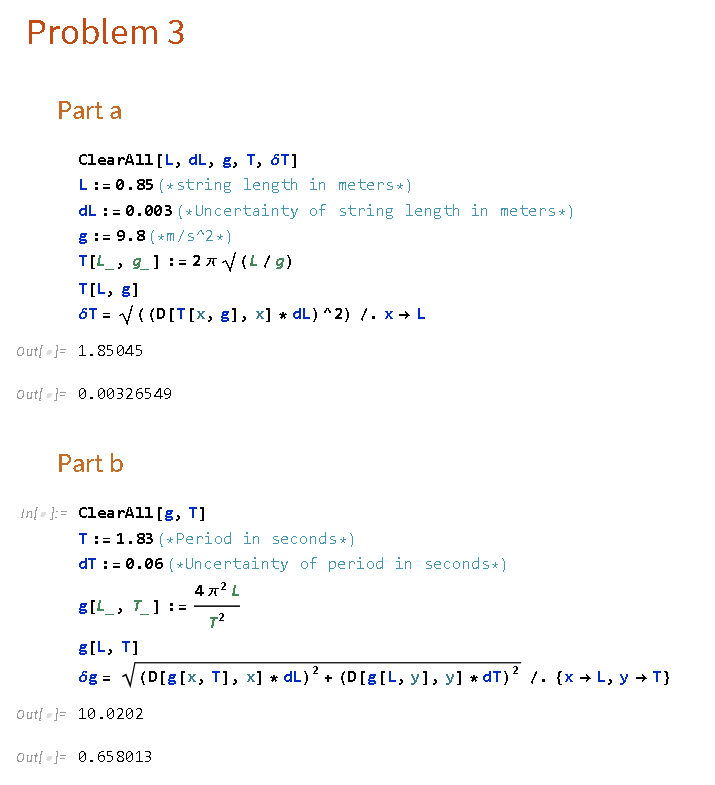

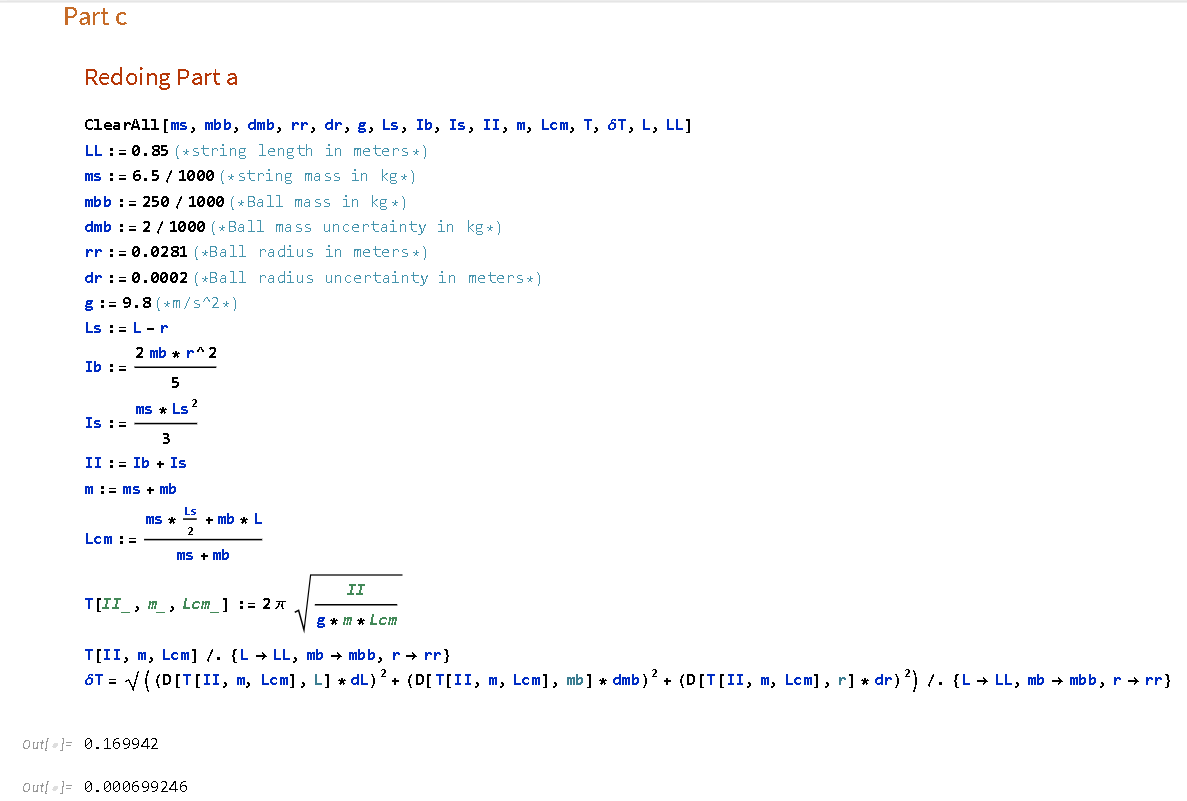

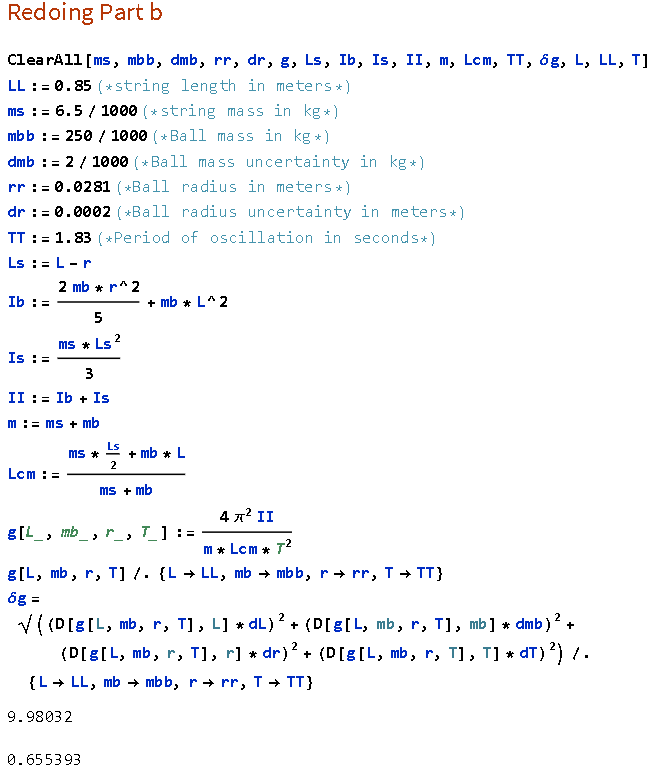

### 4

In [6]:
import sympy as sym
from numpy import sqrt

R,C,t,v0=sym.symbols("R C t v0")

v=v0*(1-sym.exp(-t/R/C))

dv_dR = sym.diff(v,R)
dv_dC = sym.diff(v,C)
dv_dt = sym.diff(v,t)
dv_dv0 = sym.diff(v,v0)

R,dR=810,8.1
C,dC=2500e-6,125e-6
t,dt=3,0.1
v0,dv0=2.0,0.03


sub = {'R':R,'C':C,"t":t,'v0':v0}

v=v.subs(sub).evalf(6)

dv=sqrt( (float(dv_dv0.subs(sub).evalf(6))*dv0)**2 + (float(dv_dR.subs(sub).evalf(6))*dR)**2 + (float(dv_dC.subs(sub).evalf(6))*dC)**2 +(float(dv_dt.subs(sub).evalf(6))*dt)**2 )
print(f"Estimated voltage at time t = {t:.2f}: \n{v:.2f} +- {dv:.3f} volts")


Estimated voltage at time t = 3.00: 
1.55 +- 0.047 volts


### Mathematica code for bonus
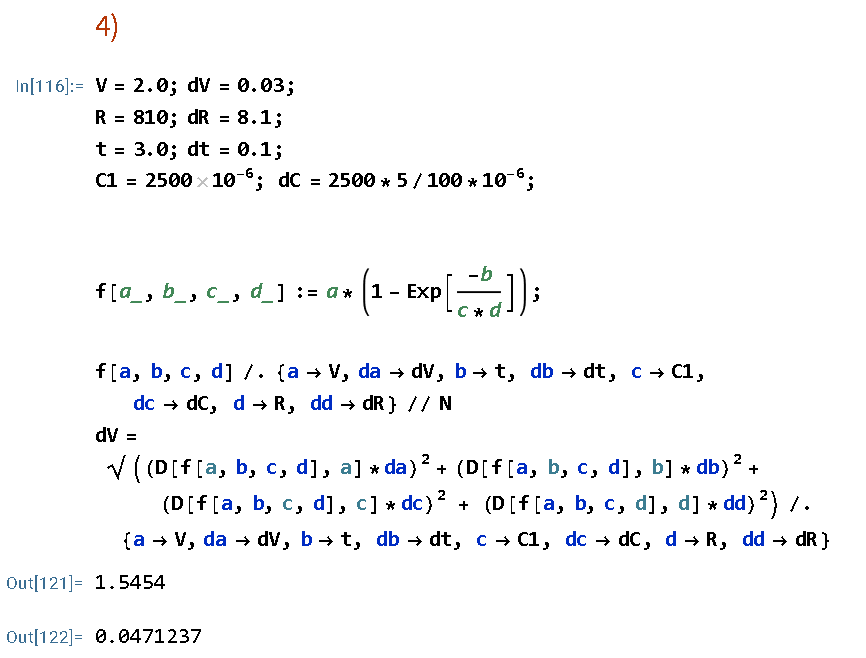